# <b> MRI Image Translation using Deep Learning

### This project focuses on MRI (Magnetic Resonance Imaging) brain scan analysis using deep learning. MRI systems generate multiple types of images, but not all types are acquired in every scan. Typically, MRI provides two key types of images:

### 1. **T1-weighted images**
### 2. **T2-weighted images**



### However, in many cases, patients may lose their T2-weighted images, while diagnosticians require both T1 and T2 images for accurate medical evaluation.

## <b> Objective

### In this project, we developed a deep learning-based model that can synthesize T2-weighted images from corresponding T1-weighted images. This ensures that medical test reports contain both types of images, making it easier for doctors to diagnose brain-related conditions.

### By leveraging deep learning, this solution helps bridge the gap in missing medical data, improving the reliability of MRI-based disease diagnosis.

### Installing Dependencies

Before running the project, ensure that all necessary dependencies are installed. Use the following command to install the `nibabel` library, which is required for handling NIfTI MRI files:

```bash
pip install nibabel


In [1]:
! pip install nibabel

#### I have already downloaded and unzipped the dataset into my Google Drive. You can easily access and download it yourself using the link below:

[Download the Biomedical Images Dataset](https://drive.google.com/file/d/1jPhzYvWvHPh6jiNHBMDP1B7gW_FWWu2N/view?usp=drive_link)

#### Once downloaded, the data will be ready for further processing in your project. Make sure to unzip it into the appropriate folder for easy access.


### Loading T1-Weighted MRI Image

Below, we load a sample T1-weighted MRI scan using the Nibabel library and check its shape to ensure correctness.


In [9]:
import nibabel as nib

# Specify a single file, not a directory
file_path = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_weighted_training_images/T1_and_T2_weighted_training_images/t1/IXI126-HH-1437-T1_fcm.nii.gz"
patient_t1_image = nib.load(file_path)
patient_t1_image_data = patient_t1_image.get_fdata()

print(patient_t1_image.shape)


(120, 120, 90)


### Loading T2-Weighted MRI Image

We load a T2-weighted MRI scan using Nibabel and check its shape. This image will be used as the ground truth for our synthetic image generation process.


In [10]:
file_path = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_weighted_training_images/T1_and_T2_weighted_training_images/t2/IXI127-HH-1451-T2_reg_fcm.nii.gz"
patient_t2_image = nib.load(file_path)
patient_t2_image_data = patient_t2_image.get_fdata()
print(patient_t2_image.shape)

(120, 120, 90)


### Importing Matplotlib

We use `matplotlib.pyplot` to visualize MRI images for comparison. This library allows us to display images in a plot, making it easier to analyze and compare different slices or images visually.


In [1]:
import matplotlib.pyplot as plt

### Visualizing MRI Image Slice

We use `matplotlib` to display a specific slice of the MRI image. The code below shows a slice range (44 to 47) from a T1-weighted MRI image:

This visualization helps in understanding the structure of the MRI images and can assist in selecting specific slices for further processing.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.025216389447450638..1.7822695970535278].


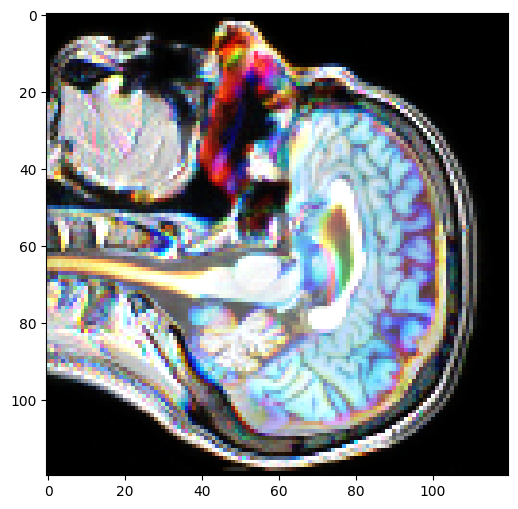

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(patient_t1_image_data[:,:,44:47])

### Visualizing MRI Image Slice

We use `matplotlib` to display a specific slice of the MRI image. The code below shows a slice range (44 to 47) from a T2-weighted MRI image:

This helps in visualizing the MRI image and selecting the desired slices for further processing or analysis.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0054288459941744804..4.547842502593994].


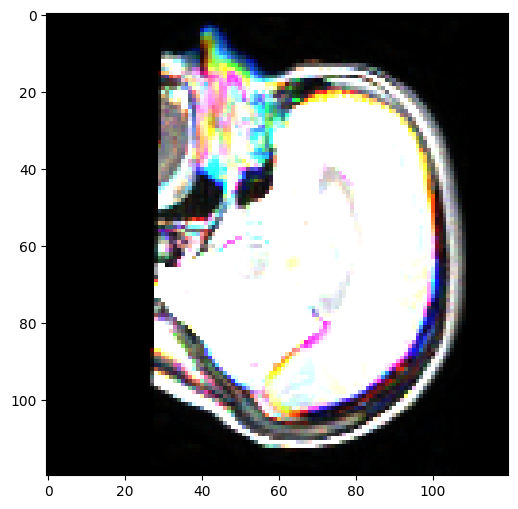

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(patient_t2_image_data[:,:,44:47])

### Creating Directories for Image Storage

We use `os.mkdir()` to create two directories for storing the MRI images:

- **Cross-validation Directory**: This directory will hold the images used for cross-validation.
- **Testing Directory**: This directory will store the images designated for testing purposes.

These directories are essential for organizing and managing the MRI image data for the different phases of model evaluation.


In [3]:
import os

In [8]:
os.mkdir(path="T1_and_T2_wieghted_cv_images")
os.mkdir(path="T1_and_T2_wieghted_test_images")

### Segregating T1 and T2 MRI Images into Training, Cross-Validation, and Test Sets

This code segregates T1 and T2 MRI images into training, cross-validation, and test sets by following these steps:

1. **Creating necessary folders**: It first creates directories for the training, cross-validation, and test sets if they do not already exist.

2. **Shuffling image files randomly**: The image files from the T1 and T2 directories are shuffled randomly to ensure the dataset is well-mixed.

3. **Splitting files into specified ratios**: The image files are split into three sets according to the following ratios:
   - 70% of the images are used for training.
   - 20% are allocated for cross-validation.
   - 10% are assigned for testing.

4. **Moving files into the corresponding folders**: The images are then moved into their respective directories for training, validation, and testing.

Finally, a success message is displayed, indicating that the data segregation process is complete.


In [10]:
import os
import shutil
import random

def move_files(dst, src, t1_files_to_move, t2_files_to_move):
    """Moves T1 and T2 files from source to destination."""
    
    os.makedirs(os.path.join(dst, "t1"), exist_ok=True)
    os.makedirs(os.path.join(dst, "t2"), exist_ok=True)

    for file in t1_files_to_move:
        shutil.move(os.path.join(src, "t1", file), os.path.join(dst, "t1", file))

    for file in t2_files_to_move:
        shutil.move(os.path.join(src, "t2", file), os.path.join(dst, "t2", file))

# Define paths based on your folder structure
source_folder = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_weighted_training_images/T1_and_T2_weighted_training_images"
cv_folder = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_wieghted_cv_images"
test_folder = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_wieghted_test_images"

# List all files
t1_files = os.listdir(os.path.join(source_folder, "t1"))
t2_files = os.listdir(os.path.join(source_folder, "t2"))

# Shuffle files randomly
random.shuffle(t1_files)
random.shuffle(t2_files)

# Define split ratios
train_fraction = 0.7
cv_fraction = 0.2
test_fraction = 0.1

# Compute split indices
t1_train_count = int(len(t1_files) * train_fraction)
t1_cv_count = int(len(t1_files) * cv_fraction)

t2_train_count = int(len(t2_files) * train_fraction)
t2_cv_count = int(len(t2_files) * cv_fraction)

# Select files for each category
t1_train_files = t1_files[:t1_train_count]
t1_cv_files_to_move = t1_files[t1_train_count:t1_train_count + t1_cv_count]
t1_test_files_to_move = t1_files[t1_train_count + t1_cv_count:]

t2_train_files = t2_files[:t2_train_count]
t2_cv_files_to_move = t2_files[t2_train_count:t2_train_count + t2_cv_count]
t2_test_files_to_move = t2_files[t2_train_count + t2_cv_count:]

# Move files to Cross Validation and Test folders
move_files(dst=cv_folder, src=source_folder, t1_files_to_move=t1_cv_files_to_move, t2_files_to_move=t2_cv_files_to_move)
move_files(dst=test_folder, src=source_folder, t1_files_to_move=t1_test_files_to_move, t2_files_to_move=t2_test_files_to_move)

print("Data segregation completed successfully! ✅")


Data segregation completed successfully! ✅


### Listing Files in T1 and T2 Directories

The following code lists the files from the T1 and T2 directories. This gives us a list of all T1 and T2 MRI image files for further processing.



In [5]:
t1_files_to_move = os.listdir("/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_weighted_training_images/T1_and_T2_weighted_training_images/t1")
t2_files_to_move = os.listdir("/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_weighted_training_images/T1_and_T2_weighted_training_images/t2")

In [12]:
from PIL import Image
import numpy as np

#### Custom Data Generator for T1 and T2 Weighted Images Translation

Now that we've segregated our T1 and T2 weighted images into three respective categories, the next step is to write the function for our custom data generator. There are a few important things to keep in mind while creating our custom image data generator.

#### Problem with Limited Training Data

First of all, our training data is pretty limited. In situations like this, if we try to train a network to translate T1 to T2 weighted images, it's likely to **overfit**. Why? Because the number of parameters in the neural network will be much larger compared to the number of training images and their pixels. The network will end up being too complex and will **overfit** for sure.

#### Solution: Increase the Training Data

To tackle the issue of limited data, we need to **increase our training data**. There are two main ways we can do this:

1. **Data Augmentation**: 
   - We can **rotate**, **horizontally shift**, and **vertically shift** both T1 and T2 weighted images to generate new variations of our images.

2. **Random Cropping**: 
   - The second approach is to **randomly crop fixed-size patches** from each image (both T1 and T2) of shape (120, 120, 90). 
   - But why do we need to crop the images instead of using the whole image? After all, we want to translate the **entire image**, not just a part of it, right?

#### Why Random Cropping Works

Actually, it doesn’t matter much. The network will learn the parameters the same way, whether it’s the whole image or a cropped part. The reason random cropping is advantageous is:

* **More Training Data**: 
  - With each epoch, we can crop a different portion of the image with different consecutive channels and pixels located in different spots. This effectively increases our training data.

* **Memory and Computation Efficiency**: 
  - The cropped images are smaller than the full images, so they use **less memory** and require **less computation time**. During inference, we can always combine the cropped portions to generate the full T2 translated image.

#### Our Custom Data Generator

So, now we need to write a function for our **custom data generator** that, for every epoch, will:

- **Perform random cropping** on both T1 and T2 weighted images.
- **Ensure the crops** come from the **same spatial locations** and have the **same consecutive channels**.
- **Return a batch** of these cropped images so that we can feed the network with them.


In [13]:
import os
import numpy as np
import nibabel as nib

def data_generator(base_path, t1_images, t2_images, crop_size, batch_size=6):
    """
    Custom data generator for T1 to T2 weighted image translation.

    Parameters:
        base_path (str): Path containing 't1' and 't2' folders.
        t1_images (list): List of T1 image filenames.
        t2_images (list): List of T2 image filenames.
        crop_size (tuple): (crop_height, crop_width, crop_depth).
        batch_size (int): Number of images per batch.

    Yields:
        Tuple: (T1 batch images, T2 batch images) as numpy arrays.
    """

    num_images = len(t1_images)
    t1_images = np.array(t1_images)
    t2_images = np.array(t2_images)
    crop_height, crop_width, crop_depth = crop_size

    while True:
        for offset in range(0, num_images, batch_size):
            t1_batch_images = list(np.random.choice(t1_images, size=batch_size, replace=False))
            t2_batch_images = list(np.random.choice(t2_images, size=batch_size, replace=False))

            t1_cropped_images_batch = []
            t2_cropped_images_batch = []

            t1_images_path = os.path.join(base_path, "t1")
            t2_images_path = os.path.join(base_path, "t2")

            for t1_img, t2_img in zip(t1_batch_images, t2_batch_images):
                # Load T1 and T2 images
                t1_image = nib.load(os.path.join(t1_images_path, t1_img)).get_fdata()
                t2_image = nib.load(os.path.join(t2_images_path, t2_img)).get_fdata()

                # Ensure both images have the same shape
                assert t1_image.shape == t2_image.shape, "T1 and T2 image shapes do not match!"

                img_height, img_width, img_depth = t1_image.shape

                # Random cropping: Ensure we do not exceed image dimensions
                h_start = np.random.randint(0, img_height - crop_height + 1)
                w_start = np.random.randint(0, img_width - crop_width + 1)
                d_start = np.random.randint(0, img_depth - crop_depth + 1)

                # Extract the same crop from both T1 and T2 images
                t1_cropped_image = t1_image[
                    h_start:h_start + crop_height,
                    w_start:w_start + crop_width,
                    d_start:d_start + crop_depth
                ]

                t2_cropped_image = t2_image[
                    h_start:h_start + crop_height,
                    w_start:w_start + crop_width,
                    d_start:d_start + crop_depth
                ]

                # Store cropped images
                t1_cropped_images_batch.append(t1_cropped_image)
                t2_cropped_images_batch.append(t2_cropped_image)

            # Convert to numpy arrays and add channel dimension
            yield np.array(t1_cropped_images_batch)[..., np.newaxis], np.array(t2_cropped_images_batch)[..., np.newaxis]


In [14]:
from keras.layers import Conv3D, Conv3DTranspose, BatchNormalization, MaxPooling3D
from keras.models import Sequential
from keras.layers import Input, UpSampling3D, UpSampling2D
from keras.layers import ReLU, Concatenate
from keras.layers import Reshape
import tensorflow as tf
import keras
from keras.models import Model

2025-03-29 21:07:56.347443: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 21:07:56.378316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 21:07:56.588027: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-29 21:07:56.733928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743262676.915595   92013 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743262676.93

### Creating a 3D U-Net for MRI Image Regression

We are building a **3D U-Net** architecture for MRI image regression, which involves:

1. **Input Layer**: 
   - Takes 3D MRI image input with shape `(128, 128, 64, 1)`.

2. **Encoder (Downsampling)**: 
   - **Conv3D** layers followed by **BatchNormalization** and **ReLU** activations.
   - **MaxPooling3D** for downsampling the image.
   - Gradually increases feature map depth from 64 to 128.

3. **Bottleneck**: 
   - The central layer with **Conv3D** (256 filters) and **ReLU** activation.

4. **Decoder (Upsampling)**: 
   - **UpSampling3D** layers for upscaling.
   - **Concatenate** layers for skip connections (connecting encoder and decoder).
   - Decreases feature map depth back to 64 filters.

5. **Output Layer**: 
   - A final **Conv3D** layer with 1 output channel for regression.

6. **Model**:
   - Compiles the model using the defined layers.

---

### Summary:

The model is a **3D U-Net architecture** aimed at **MRI image regression** with downsampling and upsampling layers, **skip connections**, and a final output layer for predicting MRI image values.


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, ReLU, MaxPooling3D, UpSampling3D, Concatenate
from tensorflow.keras.models import Model

def create_regression_unet(input_image_shape):
    """
    Creates a 3D U-Net for MRI image regression.
    """

    # Input layer
    regression_unet_input = Input(shape=input_image_shape)

    # Encoder (Downsampling)
    conv1 = Conv3D(64, (3,3,3), padding="same", use_bias=False)(regression_unet_input)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling3D((2,2,2))(conv1)

    conv2 = Conv3D(128, (3,3,3), padding="same", use_bias=False)(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling3D((2,2,2))(conv2)

    # Bottleneck
    bottleneck = Conv3D(256, (3,3,3), padding="same", use_bias=False)(pool2)
    bottleneck = BatchNormalization()(bottleneck)
    bottleneck = ReLU()(bottleneck)

    # Decoder (Upsampling)
    up2 = UpSampling3D((2,2,2))(bottleneck)
    concat2 = Concatenate()([up2, conv2])  # Skip Connection
    conv3 = Conv3D(128, (3,3,3), padding="same", use_bias=False)(concat2)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)

    up1 = UpSampling3D((2,2,2))(conv3)
    concat1 = Concatenate()([up1, conv1])  # Skip Connection
    conv4 = Conv3D(64, (3,3,3), padding="same", use_bias=False)(concat1)
    conv4 = BatchNormalization()(conv4)
    conv4 = ReLU()(conv4)

    # Output Layer
    regression_unet_out = Conv3D(1, (1,1,1), activation="relu")(conv4)  # Final regression output

    # Model
    return Model(regression_unet_input, regression_unet_out)

# Example Usage
input_shape = (128, 128, 64, 1)  # Adjust based on your dataset
model = create_regression_unet(input_shape)
model.summary()


E0000 00:00:1743262687.628734   92013 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1743262687.630171   92013 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 64, 1)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │      1,728 │ input_layer[0][0] │
│                     │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv3d[0][0]      │
│ (BatchNormalizatio… │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ re_lu[0][0]       │
│ (MaxPooling3D)      │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 64, 64,    │    221,184 │ max_pooling3d[0]… │
│                     │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv3d_1[0][0]    │
│ (BatchNormalizatio… │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling3D)      │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 32, 32,    │    884,736 │ max_pooling3d_1[… │
│                     │ 16, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv3d_2[0][0]    │
│ (BatchNormalizatio… │ 16, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling3d       │ (None, 64, 64,    │          0 │ re_lu_2[0][0]     │
│ (UpSampling3D)      │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling3d[0]… │
│ (Concatenate)       │ 32, 384)          │            │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │  1,327,104 │ concatenate[0][0] │
│                     │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv3d_3[0][0]    │
│ (BatchNormalizatio… │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat

 Total params: 2,769,153 (10.56 MB)

 Trainable params: 2,767,873 (10.56 MB)

 Non-trainable params: 1,280 (5.00 KB)

### Loss Function for Model Training

Now, we will define the loss function that will be used to optimize the model during training. The chosen loss function is based on the Mean Squared Error (MSE) combined with Huber loss. This hybrid approach helps the model handle outliers effectively while still minimizing the difference between the true and predicted T2-weighted MRI images.

- **Huber Loss** is used with a delta of 1.0 to smooth the loss, making it less sensitive to outliers than the traditional MSE.
- **MSE** is calculated by averaging the Huber loss values, providing a robust measure for error minimization during model optimization.

This function will be used during the training process to adjust the weights of the model based on the prediction errors. 


In [16]:
import tensorflow as tf

def mse_loss(t2_images_true, t2_images_pred):
    huber = tf.keras.losses.Huber(delta=1.0)  # Huber Loss instance
    mse = tf.reduce_mean(huber(t2_images_true, t2_images_pred))  # Compute loss
    return mse


### Optimizer for Model Training

For training our model, we use the **Adam optimizer**, which is widely used for its adaptive learning rate capabilities. The Adam optimizer adjusts the learning rate dynamically for each parameter, ensuring faster convergence during training.

- **Learning Rate**: We set a very low learning rate of `0.000001` to ensure that the model learns slowly and steadily, reducing the risk of overshooting during the optimization process.
  
This optimizer will be responsible for updating the model's weights during training based on the gradients computed from the loss function.


In [17]:
from tensorflow.keras.optimizers import Adam

img_translation_optimizer = Adam(learning_rate=0.000001)  

### Defining the Crop Size and Model Creation

- **Crop Size**: We define a fixed crop size of `(64, 64, 16)` for random cropping. This smaller size will be used during training to generate patches from the MRI images, reducing memory usage and computational cost.
  
- **Model Creation**: We then use the `create_regression_unet` function to create a 3D U-Net model with the specified input shape. The model is designed to predict T2-weighted images from T1-weighted images, using the cropped patches as input.

This model will be trained to learn the mapping from T1 to T2 MRI images for effective image translation.


In [18]:
crop_size = (64,64,16)
regression_unet = create_regression_unet(input_image_shape=crop_size+(1,))

### Setting Up Model Checkpoints

- **Checkpoint Directory**: First, we define a directory for saving model checkpoints during training. This helps in saving and loading the model at different training stages to avoid starting from scratch each time.

- **Creating Directory**: We use `os.makedirs()` to create the directory where the checkpoints will be saved. If the directory already exists, the `exist_ok=True` flag ensures that no error occurs.

- **Checkpoint Prefix**: We specify a checkpoint prefix path (`checkpoint_prefix`), which will be used to save the checkpoint files.

- **TensorFlow Checkpoint**: Finally, we create a TensorFlow checkpoint object. This checkpoint object will save the current state of both the model and the optimizer, allowing us to resume training from where we left off if necessary.


In [19]:
import os
import tensorflow as tf

img_translation_checkpoint_dir = "/home/gourav_dhalwal/hackathon/mri_image_translation/img_translation_checkpoints"

# Agar folder exist nahi karta toh banao
os.makedirs(img_translation_checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(img_translation_checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=img_translation_optimizer, model=regression_unet)


### Defining the Training Step Function

- **Train Step**: This function performs a single training step for the model. It computes the loss and updates the model weights using backpropagation.
  
- **Gradient Tape**: We use `tf.GradientTape()` to record the operations for automatic differentiation. It helps us compute the gradients for the loss function with respect to the model's weights.

- **Prediction**: The model (`regression_unet`) is used to predict the T2-weighted images from the input T1-weighted images (`t1_images_batch`). The model operates in training mode (`training=True`), ensuring that layers like BatchNormalization behave differently during training.

- **Loss Calculation**: The Mean Squared Error (MSE) loss function is used to calculate the difference between the predicted T2 images (`t2_images_batch_pred`) and the true T2 images (`t2_images_batch`).

- **Backpropagation**: The gradients of the loss with respect to the model’s weights are computed using `img_translation_tape.gradient()` and applied using the `img_translation_optimizer.apply_gradients()` function to update the model's parameters.

- **Return**: The function returns both the predicted T2 images and the computed loss for monitoring the model's performance during training.


In [20]:
@tf.function
def train_step(t1_images_batch,t2_images_batch):

    with tf.GradientTape() as img_translation_tape:

      regression_unet.trainable = True
      t2_images_batch_pred = regression_unet(t1_images_batch,training=True)

      img_translation_loss = mse_loss(t2_images_true=t2_images_batch,t2_images_pred=t2_images_batch_pred)

      img_translation_gradients = img_translation_tape.gradient(img_translation_loss, regression_unet.trainable_variables)
      img_translation_optimizer.apply_gradients(zip(img_translation_gradients, regression_unet.trainable_variables))

    return t2_images_batch_pred,img_translation_loss

### Defining the Cross-Validation Step Function

- **Cross-Validation Step**: This function performs a cross-validation step for the model without updating its weights. It is used to evaluate the model's performance on a separate validation dataset.

- **Model Set to Non-Trainable**: The model (`regression_unet`) is set to non-trainable (`trainable=False`) during cross-validation to prevent updates to the model's weights while calculating the validation loss.

- **Prediction**: The model predicts T2-weighted images from the input T1-weighted images (`t1_cv_images_batch`) during cross-validation, using `training=False`. This ensures that layers like BatchNormalization behave as they would during inference.

- **Loss Calculation**: The Mean Squared Error (MSE) loss is computed between the predicted T2 images (`t2_cv_images_batch_pred`) and the true T2 images (`t2_cv_images_batch`).

- **Return**: The function returns both the predicted T2 images and the computed validation loss, allowing us to monitor the model's performance on unseen data.


In [21]:
@tf.function
def cv_step(t1_cv_images_batch,t2_cv_images_batch):

  regression_unet.trainable = False
      
  t2_cv_images_batch_pred = regression_unet(t1_cv_images_batch,training=False)

  img_translation_cv_loss = mse_loss(t2_images_true=t2_cv_images_batch,t2_images_pred=t2_cv_images_batch_pred)

  return t2_cv_images_batch_pred,img_translation_cv_loss

### Setting Up Training Parameters

- **Epochs**: We set the number of epochs to 100. This is the number of times the entire dataset will pass through the model during training.
  
- **Training Batch Size**: The batch size for training is set to 2. This means that during each training iteration, 2 images (T1 and corresponding T2) will be processed together in a batch.

- **Cross-Validation Batch Size**: Similarly, the batch size for cross-validation is set to 2, meaning 2 images will be used for validating the model at each step.


In [22]:
epochs = 100
train_batch_size = 2
cv_batch_size = 2

### Setting Up Callbacks

We are using a callback function `ReduceLROnPlateau`, which dynamically reduces the learning rate if the model's performance plateaus. Here's how it works:

- **`min_lr`**: The minimum learning rate is set to `0.000000001`. This is the lowest value the learning rate will be reduced to.
  
- **`verbose`**: The verbosity is set to `1`, meaning that the callback will print messages whenever the learning rate is reduced.

- **`patience`**: The patience is set to `3`, meaning that if there is no improvement in validation loss for 3 consecutive epochs, the learning rate will be reduced.


In [23]:
callbacks = keras.callbacks.CallbackList(callbacks=[keras.callbacks.ReduceLROnPlateau(min_lr=0.000000001,verbose=1,patience=3)])

### Training Function

In this section, we define the `train` function, which handles the entire training process for the MRI image translation task. Here’s how it works:

1. **Base Paths and Validation:**
   - The function begins by defining the base paths for the training and cross-validation (CV) datasets.
   - It checks if these paths exist. If any path is missing, a `FileNotFoundError` is raised with a message.

2. **Listing Image Files:**
   - The function lists all files in the `t1` and `t2` directories of both the training and CV datasets. If the required subdirectories (`t1` and `t2`) are missing, an error is thrown.

3. **Data Generators:**
   - It sets up the `train_datagen` and `cv_datagen` using the `data_generator` function, which yields batches of cropped images for training and validation.
   
4. **Training Loop:**
   - The function enters a loop over the number of epochs specified.
   - For each epoch, it processes batches of images for both training and cross-validation.
   - It uses `train_step` for the training phase and `cv_step` for the validation phase. These steps compute the loss and adjust model weights accordingly.
   
5. **Checkpointing:**
   - Every 5 epochs, the model state is saved via a checkpoint. This helps in resuming training or using the model later.

6. **Callbacks:**
   - If callbacks are defined, the `on_batch_end` method is called at the end of each batch to allow additional functionality (e.g., learning rate adjustments).
   
7. **Completion Message:**
   - Once all epochs are completed, a success message is printed to indicate the end of the training.

This function ensures that the training and validation datasets are processed efficiently while saving the model state at regular intervals.


In [24]:
import os

def train(epochs):
    train_base_path = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_weighted_training_images/T1_and_T2_weighted_training_images"
    cv_base_path = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_wieghted_cv_images"
    
    # Ensure paths exist
    if not os.path.exists(train_base_path):
        raise FileNotFoundError(f"Train base path does not exist: {train_base_path}")
    if not os.path.exists(cv_base_path):
        raise FileNotFoundError(f"CV base path does not exist: {cv_base_path}")
    
    try:
        t1_train_images = os.listdir(os.path.join(train_base_path, "t1"))
        t2_train_images = os.listdir(os.path.join(train_base_path, "t2"))
        t1_cv_images = os.listdir(os.path.join(cv_base_path, "t1"))
        t2_cv_images = os.listdir(os.path.join(cv_base_path, "t2"))
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Error: One of the subdirectories (t1/t2) is missing. {e}")

    # Data generators
    train_datagen = data_generator(base_path=train_base_path, t1_images=t1_train_images, t2_images=t2_train_images,
                                   crop_size=crop_size, batch_size=train_batch_size)
    
    cv_datagen = iter(data_generator(base_path=cv_base_path, t1_images=t1_cv_images, t2_images=t2_cv_images, 
                                     crop_size=crop_size, batch_size=cv_batch_size))
    
    print("Starting training...")
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        time_step = 1

        for t1_images_batch, t2_images_batch in train_datagen:
            if time_step > 3:  # Max 3 steps per epoch
                break
            
            t2_images_batch_pred, img_translation_train_loss = train_step(t1_images_batch, t2_images_batch)

            try:
                t1_cv_images_batch, t2_cv_images_batch = next(cv_datagen)
            except StopIteration:
                print("CV dataset exhausted, resetting...")
                cv_datagen = iter(data_generator(base_path=cv_base_path, t1_images=t1_cv_images, t2_images=t2_cv_images, 
                                                 crop_size=crop_size, batch_size=cv_batch_size))
                t1_cv_images_batch, t2_cv_images_batch = next(cv_datagen)

            t2_cv_images_batch_pred, img_translation_cv_loss = cv_step(t1_cv_images_batch, t2_cv_images_batch)

            print(f"Epoch: {epoch+1}, Step: {time_step}, Train Loss: {img_translation_train_loss.numpy():.4f}, Val Loss: {img_translation_cv_loss.numpy():.4f}")

            if 'callbacks' in globals():
                callbacks.on_batch_end(time_step)

            time_step += 1  # Increase step count

        if epoch % 5 == 0 and 'checkpoint' in globals():
            checkpoint.save(file_prefix=checkpoint_prefix)
            print("Checkpoint saved.")

    print("Training complete!")


In [25]:
train(epochs)


Starting training...
Epoch 1/100
Epoch: 1, Step: 1, Train Loss: 0.3006, Val Loss: 0.3747
Epoch: 1, Step: 2, Train Loss: 0.4200, Val Loss: 0.3360
Epoch: 1, Step: 3, Train Loss: 0.5047, Val Loss: 0.3309
Checkpoint saved.
Epoch 2/100
Epoch: 2, Step: 1, Train Loss: 0.3577, Val Loss: 0.4030
Epoch: 2, Step: 2, Train Loss: 0.5252, Val Loss: 0.4499
Epoch: 2, Step: 3, Train Loss: 0.5749, Val Loss: 0.5943
Epoch 3/100
Epoch: 3, Step: 1, Train Loss: 0.1359, Val Loss: 0.6901
Epoch: 3, Step: 2, Train Loss: 0.5289, Val Loss: 0.4912
Epoch: 3, Step: 3, Train Loss: 0.4492, Val Loss: 0.6119
Epoch 4/100
Epoch: 4, Step: 1, Train Loss: 0.2424, Val Loss: 0.5801
Epoch: 4, Step: 2, Train Loss: 0.4716, Val Loss: 0.5080
Epoch: 4, Step: 3, Train Loss: 0.3453, Val Loss: 0.4632
Epoch 5/100
Epoch: 5, Step: 1, Train Loss: 0.4743, Val Loss: 0.4956
Epoch: 5, Step: 2, Train Loss: 0.4579, Val Loss: 0.4804
Epoch: 5, Step: 3, Train Loss: 0.2294, Val Loss: 0.3480
Epoch 6/100
Epoch: 6, Step: 1, Train Loss: 0.2135, Val Loss: 

### Test Data Generator

In this section, we set up the test data generator for evaluating the model's performance on unseen data. Here's what happens:

1. **Test Base Path:**
   - The `test_base_path` is defined, which points to the directory where the test images are stored.
   
2. **Listing Test Images:**
   - The code lists all the images in the `t1` and `t2` directories within the `test_base_path`, assuming these directories contain the T1 and T2 weighted MRI images respectively.

3. **Creating Test Data Generator:**
   - The `data_generator` function is used to create a generator that yields batches of test images. The parameters include:
     - `base_path`: Path to the test dataset.
     - `t1_images` and `t2_images`: Lists of the T1 and T2 test images.
     - `crop_size`: The size of the cropped patches to be used for model input.
     - `batch_size`: The batch size for testing, which is set to 3 in this case.

This test data generator will be used to pass the test images into the model during evaluation, allowing us to assess its performance on new, unseen data.


In [52]:
test_base_path = "/home/gourav_dhalwal/hackathon/mri_image_translation/T1_and_T2_wieghted_test_images"
t1_test_images = os.listdir(os.path.join(test_base_path,"t1"))
t2_test_images = os.listdir(os.path.join(test_base_path,"t2"))

test_datagen = data_generator(base_path=test_base_path,t1_images=t1_test_images,t2_images=t2_test_images,
                              crop_size=crop_size,batch_size=3)

### Evaluating Test Images

1. **Fetching a Test Batch:**
   - We retrieve a batch of test images using the `next(test_datagen)` function.
   - This returns two variables:
     - `t1_test_images_batch`: A batch of T1-weighted test images.
     - `t2_test_images_batch`: The corresponding ground truth T2-weighted images.

2. **Predicting T2 Images:**
   - We use the trained model (`regression_unet`) to predict the T2 images for the batch of T1 images:
     - `t2_test_images_batch_pred = regression_unet(t1_test_images_batch, training=False)`
   - This generates predicted T2-weighted images for the input T1 images.

3. **Converting Predictions to Numpy:**
   - The predicted T2 images are in TensorFlow's tensor format. We convert them to a NumPy array using `.numpy()`:
     - `t2_test_images_batch_pred = t2_test_images_batch_pred.numpy()`

4. **Reshaping Single Image:**
   - We take the first image from the predicted batch (`t2_test_images_batch_pred[0]`) and reshape it to match the required dimensions for visualization:
     - `t2_test_single_image = t2_test_images_batch_pred[0].reshape(64, 64, 16)`
   - This reshaped image (`t2_test_single_image`) can now be visualized or further processed.

This process allows us to evaluate the model’s performance on test data by comparing the predicted T2 images with the actual ground truth T2 images.


In [53]:
t1_test_images_batch,t2_test_images_batch = next(test_datagen)

In [54]:
t2_test_images_batch_pred = regression_unet(t1_test_images_batch,training=False)

In [55]:
t2_test_images_batch_pred = t2_test_images_batch_pred.numpy()

In [56]:
t2_test_single_image = t2_test_images_batch_pred[0].reshape(64,64,16)

### Translated Synthetic T2-Weighted Image

Below is the translated synthetic version of a randomly cropped T1-weighted image from the Cross-Validation data. This synthetic T2-weighted image is generated by the trained network.

The following steps describe the process:

1. **Random Cropping**: A random crop of the T1-weighted image from the Cross-Validation set is selected.
2. **Image Translation**: The T1-weighted image is passed through the network to generate the synthetic T2-weighted image.
3. **Display the Result**: The generated synthetic T2-weighted image is displayed using Matplotlib.

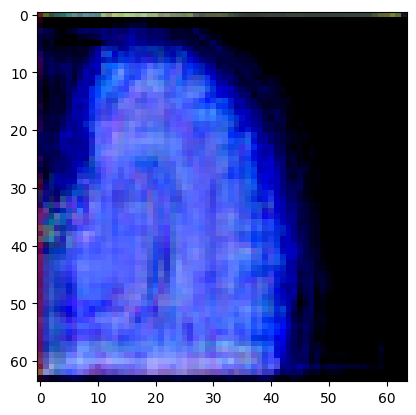

In [ ]:
plt.imshow(t2_test_single_image[:,:,13:16])

In [58]:
t2_test_single_image = t2_test_images_batch[0].reshape(64,64,16)


### Actual T2-Weighted Image from Cross-Validation Data

Below is the actual T2-weighted cropped image from the cross-validation data. As observed, the network has successfully generated synthetic translated images that are similar to the actual T2-weighted cropped images.

The process involves comparing the synthetic T2 image generated by the network with the real T2 image to assess the model's accuracy.

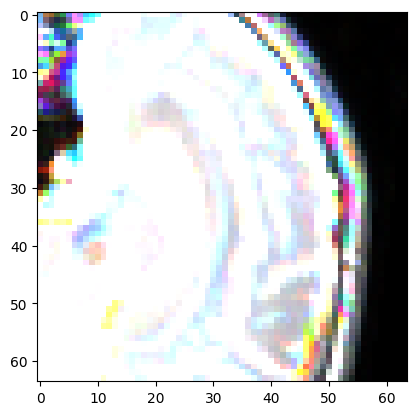

In [59]:
plt.imshow(t2_test_single_image[:,:,13:16])
